In [1]:
library("deMULTIplex")
library("ggplot2")

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”


In [2]:
## deMULTIplexing ##
setwd("/project/ABKlab/Natalia/sc-RNA-seq/single_TLS_project")

# Table 72h

In [3]:
bartable_72h <- readRDS("./files/bartable_72h.rds")

In [4]:
head(bartable_72h)
dim(bartable_72h)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar41,Bar42,Bar43,Bar44,Bar45,Bar46,Bar47,Bar48,nUMI,nUMI_total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCACACGTCATA,4,3,13,2,9,6,3,2,26,13,⋯,4,5,1,11,2,8,24,2,239,269
AAACCCACATCCTTGC,5,3,8,3,8,6,3,2,2,6,⋯,2,5,3,5,3,12,12,3,169,184
AAACCCACATTAAGCC,5,0,9,1,4,6,2,3,3,8,⋯,0,3,3,5,3,11,14,2,172,186
AAACCCACATTGTCGA,5,3,1615,4,6,5,4,2,4,6,⋯,1,1,1,6,3,6,9,4,1766,1994
AAACCCAGTAGTCTTG,2,1,9,0,5,11,1,4,4,7,⋯,1,4,1,6,5,9,14,4,234,273
AAACCCAGTCCTCATC,3,1,2,1,5,4,1,2,2,2,⋯,6,2,3,7,0,4,3,4,275,303


[1] 13763    50

In [5]:
x <- bartable_72h
initial_cell_number <- nrow(bartable_72h)

## demultiplexing: classification

In [6]:
## Visualize barcode space
bar.tsne <- barTSNE(x[,1:48]) # number of barcodes and not columns !!
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/72h_bc.check.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()


Loading required package: Rtsne



Performing PCA
Read the 13763 x 48 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 13763
Done in 16.40 seconds (sparsity = 0.010308)!
Learning embedding...
Iteration 50: error is 99.309701 (50 iterations in 2.43 seconds)
Iteration 100: error is 99.309701 (50 iterations in 3.11 seconds)
Iteration 150: error is 99.309658 (50 iterations in 3.94 seconds)
Iteration 200: error is 99.272407 (50 iterations in 4.10 seconds)
Iteration 250: error is 98.729104 (50 iterations in 4.09 seconds)
Iteration 300: error is 3.820772 (50 iterations in 2.45 seconds)
Iteration 350: error is 3.421982 (50 iterations in 2.28 seconds)
Iteration 400: error is 3.220918 (50 iterations in 2.23 seconds)
Iteration 450: error is 3.096607 (50 iterations in 2.19 seconds)
Iteration 500: error is 3.011058 (50 iterations in 2.16 seconds)
Iteration 550: error is 2.947665 (50 iterations in 

png 
  2

[1] 0.01
[1] "No threshold found for Bar35..."
[1] 0.03
[1] "No threshold found for Bar35..."
[1] 0.05
[1] "No threshold found for Bar35..."
[1] 0.07
[1] "No threshold found for Bar35..."
[1] 0.09
[1] "No threshold found for Bar35..."
[1] 0.11
[1] "No threshold found for Bar35..."
[1] 0.13
[1] "No threshold found for Bar35..."
[1] 0.15
[1] "No threshold found for Bar35..."
[1] 0.17
[1] "No threshold found for Bar35..."
[1] 0.19
[1] "No threshold found for Bar35..."
[1] 0.21
[1] "No threshold found for Bar35..."
[1] 0.23
[1] "No threshold found for Bar35..."
[1] 0.25
[1] "No threshold found for Bar35..."
[1] 0.27
[1] "No threshold found for Bar35..."
[1] 0.29
[1] "No threshold found for Bar35..."
[1] 0.31
[1] "No threshold found for Bar35..."
[1] 0.33
[1] "No threshold found for Bar35..."
[1] 0.35
[1] "No threshold found for Bar35..."
[1] 0.37
[1] "No threshold found for Bar35..."
[1] 0.39
[1] "No threshold found for Bar35..."
[1] 0.41
[1] "No threshold found for Bar35..."
[1] 0.43
[1] 

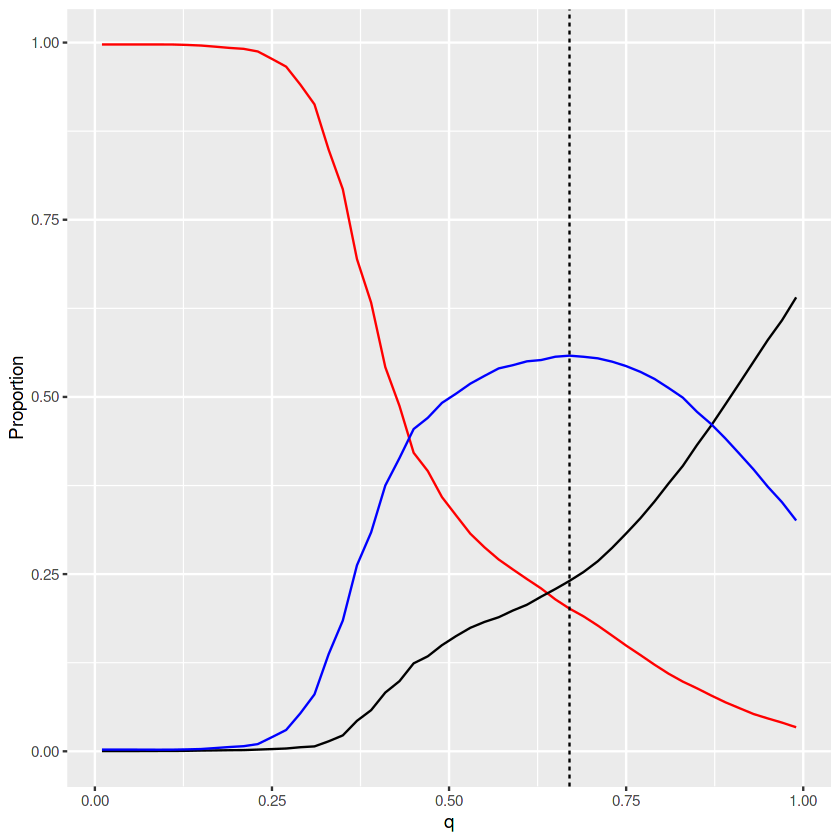

In [16]:
# Sample classification
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- x[,1:48]
good.bars <- paste("Bar",1:48,sep="")  # NOTE: In this hypothetical example, barcodes 91-96 were not detected
bar.table <- bar.table.full[, good.bars]  # Remove missing bars and summary columns
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))

## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]


In [17]:
table(round1.calls)
length(round1.calls)

round1.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      94      181      129      179       99      141      189      198 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     180      126       60      129      122      137      188      139 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     109      136      196      206      242      165      176      120 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      90      172      148      246      130      115      211      112 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     161      195      301      133      146      210      179      132 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     355      186      159      206      105      186      164     2771 
Negative 
    3309 

[1] 13763

In [18]:
## Round 2 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

[1] 0.01
[1] "No threshold found for Bar35..."
[1] 0.03
[1] "No threshold found for Bar35..."
[1] 0.05
[1] "No threshold found for Bar35..."
[1] 0.07
[1] "No threshold found for Bar35..."
[1] 0.09
[1] "No threshold found for Bar35..."
[1] 0.11
[1] "No threshold found for Bar35..."
[1] 0.13
[1] "No threshold found for Bar35..."
[1] 0.15
[1] "No threshold found for Bar35..."
[1] 0.17
[1] "No threshold found for Bar35..."
[1] 0.19
[1] "No threshold found for Bar35..."
[1] 0.21
[1] "No threshold found for Bar35..."
[1] 0.23
[1] "No threshold found for Bar35..."
[1] 0.25
[1] "No threshold found for Bar35..."
[1] 0.27
[1] "No threshold found for Bar35..."
[1] 0.29
[1] "No threshold found for Bar35..."
[1] 0.31
[1] "No threshold found for Bar35..."
[1] 0.33
[1] "No threshold found for Bar35..."
[1] 0.35
[1] "No threshold found for Bar35..."
[1] 0.37
[1] "No threshold found for Bar35..."
[1] 0.39
[1] "No threshold found for Bar35..."
[1] 0.41
[1] "No threshold found for Bar35..."
[1] 0.43
[1] 

In [19]:
length(neg.cells)

table(round2.calls)
length(round2.calls)

[1] 3943

round2.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     102      183      135      179      104       90      189      223 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     183      128       50      135       81      134      179      157 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     123      140      185      203      243      161      179      109 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      76      188      161      249      114       85      218       45 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     158      198      297      145      141      205      179      140 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     349      192      168      210      105       82      160     2360 
Negative 
     634 

[1] 10454

In [20]:
## Round 3 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results3 <- findThresh(call.list=bar.table_sweep.list)
round3.calls <- classifyCells(bar.table, q=findQ(threshold.results3$res, threshold.results3$extrema))
neg.cells <- c(neg.cells, names(round3.calls)[which(round3.calls == "Negative")])

[1] 0.01
[1] "No threshold found for Bar35..."
[1] 0.03
[1] "No threshold found for Bar35..."
[1] 0.05
[1] "No threshold found for Bar35..."
[1] 0.07
[1] "No threshold found for Bar35..."
[1] 0.09
[1] "No threshold found for Bar35..."
[1] 0.11
[1] "No threshold found for Bar35..."
[1] 0.13
[1] "No threshold found for Bar35..."
[1] 0.15
[1] "No threshold found for Bar35..."
[1] 0.17
[1] "No threshold found for Bar35..."
[1] 0.19
[1] "No threshold found for Bar35..."
[1] 0.21
[1] "No threshold found for Bar35..."
[1] 0.23
[1] "No threshold found for Bar35..."
[1] 0.25
[1] "No threshold found for Bar35..."
[1] 0.27
[1] "No threshold found for Bar35..."
[1] 0.29
[1] "No threshold found for Bar35..."
[1] 0.31
[1] "No threshold found for Bar35..."
[1] 0.33
[1] "No threshold found for Bar35..."
[1] 0.35
[1] "No threshold found for Bar35..."
[1] 0.37
[1] "No threshold found for Bar35..."
[1] 0.39
[1] "No threshold found for Bar35..."
[1] 0.41
[1] "No threshold found for Bar35..."
[1] 0.43
[1] 

In [21]:
length(neg.cells)

table(round3.calls)
length(round3.calls)

[1] 4577

round3.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     102      183      135      179      104       90      189      223 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     183      128       50      135       81      134      179      157 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     123      140      185      203      243      161      179      109 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      76      188      161      249      114       85      218       45 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     158      198      297      145      141      205      179      140 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     349      192      168      210      105       82      160     2360 
Negative 
     634 

[1] 10454

In [22]:
## Repeat until all no negative cells remain (usually 3 rounds)...
final.calls <- c(round3.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round3.calls),neg.cells)

In [23]:
head(bar.table)
dim(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar39,Bar40,Bar41,Bar42,Bar43,Bar44,Bar45,Bar46,Bar47,Bar48
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCACATTGTCGA,5,3,1615,4,6,5,4,2,4,6,⋯,2,4,1,1,1,6,3,6,9,4
AAACCCAGTAGTCTTG,2,1,9,0,5,11,1,4,4,7,⋯,2,3,1,4,1,6,5,9,14,4
AAACCCAGTCCTCATC,3,1,2,1,5,4,1,2,2,2,⋯,2,0,6,2,3,7,0,4,3,4
AAACCCAGTGATGTAA,3,2,6,2,5,4,2,1,3,1,⋯,0,1,0,1,5,3,1,6,9,4
AAACCCATCCAGCAAT,7,2,10,5,9,5,3,7,4,2,⋯,1,1,1,5,1,4,2,70,7,4
AAACGAAAGCGGTAGT,3,2,5,1,6,5,1,2,4,1,⋯,1,1,2,1,2,102,2,5,6,2


[1] 10454    48

In [24]:
## Visualize barcode space
bar.tsne <- barTSNE(bar.table[,1:48]) 
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/72h_bc.check_round3.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()

Performing PCA
Read the 10454 x 48 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 10454
Done in 8.73 seconds (sparsity = 0.012305)!
Learning embedding...
Iteration 50: error is 96.652962 (50 iterations in 1.77 seconds)
Iteration 100: error is 96.640876 (50 iterations in 1.95 seconds)
Iteration 150: error is 92.682231 (50 iterations in 1.79 seconds)
Iteration 200: error is 91.866172 (50 iterations in 1.64 seconds)
Iteration 250: error is 91.667378 (50 iterations in 1.59 seconds)
Iteration 300: error is 3.035661 (50 iterations in 1.75 seconds)
Iteration 350: error is 2.609916 (50 iterations in 1.72 seconds)
Iteration 400: error is 2.400988 (50 iterations in 1.64 seconds)
Iteration 450: error is 2.272154 (50 iterations in 1.61 seconds)
Iteration 500: error is 2.186060 (50 iterations in 1.62 seconds)
Iteration 550: error is 2.123698 (50 iterations in 1

png 
  2

## Generation of barcode table

In [34]:
head(bar.table)
dim(bar.table)
bar.table$cell <- rownames(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar40,Bar41,Bar42,Bar43,Bar44,Bar45,Bar46,Bar47,Bar48,cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
AAACCCACATTGTCGA,5,3,1615,4,6,5,4,2,4,6,⋯,4,1,1,1,6,3,6,9,4,AAACCCACATTGTCGA
AAACCCAGTAGTCTTG,2,1,9,0,5,11,1,4,4,7,⋯,3,1,4,1,6,5,9,14,4,AAACCCAGTAGTCTTG
AAACCCAGTCCTCATC,3,1,2,1,5,4,1,2,2,2,⋯,0,6,2,3,7,0,4,3,4,AAACCCAGTCCTCATC
AAACCCAGTGATGTAA,3,2,6,2,5,4,2,1,3,1,⋯,1,0,1,5,3,1,6,9,4,AAACCCAGTGATGTAA
AAACCCATCCAGCAAT,7,2,10,5,9,5,3,7,4,2,⋯,1,1,5,1,4,2,70,7,4,AAACCCATCCAGCAAT
AAACGAAAGCGGTAGT,3,2,5,1,6,5,1,2,4,1,⋯,1,2,1,2,102,2,5,6,2,AAACGAAAGCGGTAGT


[1] 10454    49

In [35]:
table(final.calls)
length(final.calls)

final.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     102      183      135      179      104       90      189      223 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     183      128       50      135       81      134      179      157 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     123      140      185      203      243      161      179      109 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      76      188      161      249      114       85      218       45 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     158      198      297      145      141      205      179      140 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     349      192      168      210      105       82      160     2360 
Negative 
    5211 

[1] 15031

In [36]:
prueba <- as.matrix(final.calls)
prueba <- as.data.frame(prueba)
prueba$cell <- rownames(prueba)
table(prueba$V1)

prueba.merged <- merge (bar.table, prueba, by = "cell")
prueba.merged$V1 <- as.character(prueba.merged$V1)

barcode_assignment_72h <- prueba.merged
head(barcode_assignment_72h)
dim(barcode_assignment_72h)
table(barcode_assignment_72h$V1)


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     102      183      135      179      104       90      189      223 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     183      128       50      135       81      134      179      157 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     123      140      185      203      243      161      179      109 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      76      188      161      249      114       85      218       45 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     158      198      297      145      141      205      179      140 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     349      192      168      210      105       82      160     2360 
Negative 
    5211 

,cell,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,⋯,Bar40,Bar41,Bar42,Bar43,Bar44,Bar45,Bar46,Bar47,Bar48,V1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AAACCCACATTGTCGA,5,3,1615,4,6,5,4,2,4,⋯,4,1,1,1,6,3,6,9,4,Bar3
2,AAACCCAGTAGTCTTG,2,1,9,0,5,11,1,4,4,⋯,3,1,4,1,6,5,9,14,4,Bar32
3,AAACCCAGTCCTCATC,3,1,2,1,5,4,1,2,2,⋯,0,6,2,3,7,0,4,3,4,Bar29
4,AAACCCAGTGATGTAA,3,2,6,2,5,4,2,1,3,⋯,1,0,1,5,3,1,6,9,4,Bar25
5,AAACCCATCCAGCAAT,7,2,10,5,9,5,3,7,4,⋯,1,1,5,1,4,2,70,7,4,Bar37
6,AAACGAAAGCGGTAGT,3,2,5,1,6,5,1,2,4,⋯,1,2,1,2,102,2,5,6,2,Bar44


[1] 10454    50


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
     102      183      135      179      104       90      189      223 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
     183      128       50      135       81      134      179      157 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     123      140      185      203      243      161      179      109 
   Bar31    Bar32    Bar33    Bar34    Bar36    Bar37    Bar38    Bar39 
      76      188      161      249      114       85      218       45 
    Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45    Bar46 
     158      198      297      145      141      205      179      140 
   Bar47    Bar48     Bar5     Bar6     Bar7     Bar8     Bar9  Doublet 
     349      192      168      210      105       82      160     2360 
Negative 
     634 

## Generation of table of assignment for stacked barplot visualization

In [37]:
x <- data.frame(table(barcode_assignment_72h$V1))
x

Var1,Freq
<fct>,<int>
Bar1,102
Bar10,183
Bar11,135
Bar12,179
Bar13,104
Bar14,90
Bar15,189
Bar16,223
Bar17,183


In [38]:
bar <- sum(x$Freq[-(49:50)])
doublet <- x[x[1]=='Doublet',2]
negative <- x[x[1]=='Negative',2]
unassigned <- initial_cell_number - sum(bar, doublet, negative)
unassigned

[1] 949

In [39]:
x <- data.frame(Number_cells= c(bar, doublet, negative, unassigned))
rownames(x) <- c("Barcode_assigned","Doublet","Negative", "Unassigned")
x$Category <- rownames(x)
x$Category <- factor(x$Category, levels = c("Unassigned","Negative","Doublet","Barcode_assigned"))
x$Sample <- "gast_72h"
head(x)

multiseq_assignment_72h <- x

,Number_cells,Category,Sample
,<int>,<fct>,<chr>
Barcode_assigned,9820,Barcode_assigned,gast_72h
Doublet,2360,Doublet,gast_72h
Negative,634,Negative,gast_72h
Unassigned,949,Unassigned,gast_72h


In [41]:
sum(multiseq_assignment_72h$Number_cells)
initial_cell_number
sum(multiseq_assignment_72h$Number_cells) == initial_cell_number

[1] 13763

[1] 13763

[1] TRUE

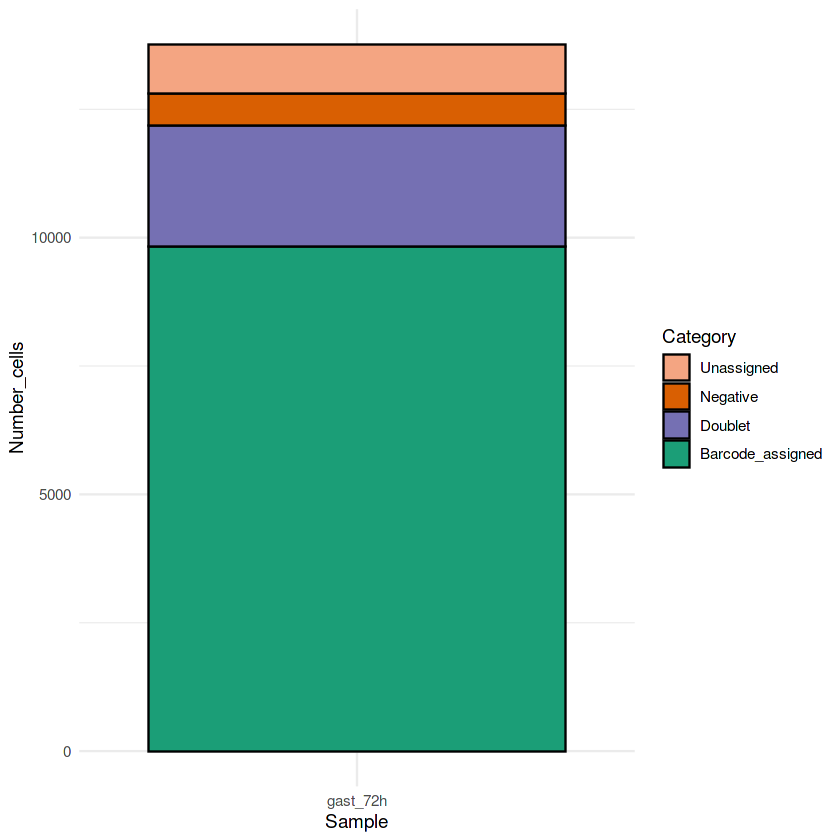

In [42]:
# Stacked
ggplot(x, aes(fill=Category, y=Number_cells, x=Sample)) + 
  geom_bar(position="stack", stat="identity", colour="black") +
  scale_fill_manual(values=c("#f4a582", "#d95f02", "#7570b3", "#1b9e77")) + 
  theme_minimal()

## Saving the files

In [45]:
# Save files
## 
saveRDS(barcode_assignment_72h, file = "./files/demultiplexing/barcode_assignment_72h.rds")
saveRDS(multiseq_assignment_72h, file = "./files/demultiplexing/multiseq_assignment_72h.rds")